# **Generic Reddit Scraper for Topic and Subreddit** 

In [3]:
!pip install praw

# ***Necessary Imports***

In [4]:
import argparse
import sys
import praw
from prawcore import NotFound, PrawcoreException
import csv
import json
import datetime as dt
import pandas as pd

**Initializing API**

In [5]:
c_id = "HKkrWHOchy0UIvJKL1jTvQ"               # Personal Use Script (14 char)
c_secret = "hwEgyEAkhQX7ikwFEIQnom15dCGXRQ"           # Secret key (27 char)
u_a = "scraper"               # App name
usrnm = "terrynier"      # Reddit username
passwd = "Reddit.2020!@"     # Reddit login password

**Login to reddit using the secret token key:**

In [6]:
reddit = praw.Reddit(client_id = c_id, 
                         client_secret = c_secret, 
                         user_agent = u_a, 
                         username = usrnm, 
                         password = passwd)

**Scraping the Bitcoin for financial posts and comments.**

In [7]:
yoursubbreddit='Bitcoin'
subbreddit=reddit.subreddit('Bitcoin')

**Structure:**

**Reddit -> Subreddits (r/wallstreetbets) -> posts -> comments -> comments/MutiComments**

In [8]:
commentsColumns=[
  'total_awards_received ',
 'approved_at_utc ',
 'author_flair_template_id ',
 'likes ',
 'user_reports ',
 'saved ',
 'id ',
 'banned_at_utc ',
 'mod_reason_title ',
 'gilded ',
 'archived ',
 'no_follow ',
 'author ',
 'score ',
 'author_fullname ',
 'report_reasons ',
 'approved_by ',
 'all_awardings ',
 'subreddit_id ',
 'body ',
 'edited ',
 'author_flair_css_class ',
 'is_submitter ',
 'downs ',
 'author_flair_richtext ',
 'subreddit ',
 'author_flair_text_color ',
 'score_hidden ',
 'permalink ',
 'num_reports ',
 'locked ',
 'name ',
 'created ',
 'author_flair_text ',
 'collapsed ',
 'created_utc ',
 'subreddit_name_prefixed ',
 'controversiality ']

##removing spaces 
commentColumns= [c.strip() for c in commentsColumns]

In [9]:
print(commentColumns)

['total_awards_received', 'approved_at_utc', 'author_flair_template_id', 'likes', 'user_reports', 'saved', 'id', 'banned_at_utc', 'mod_reason_title', 'gilded', 'archived', 'no_follow', 'author', 'score', 'author_fullname', 'report_reasons', 'approved_by', 'all_awardings', 'subreddit_id', 'body', 'edited', 'author_flair_css_class', 'is_submitter', 'downs', 'author_flair_richtext', 'subreddit', 'author_flair_text_color', 'score_hidden', 'permalink', 'num_reports', 'locked', 'name', 'created', 'author_flair_text', 'collapsed', 'created_utc', 'subreddit_name_prefixed', 'controversiality']


**Date : day/week/monthly/yearly**

In [10]:
topPosts=subbreddit.top(limit=10,time_filter='week')
totalPosts=0
totalComments=0
badData=0
commentsData=pd.DataFrame(columns=commentColumns)
for post in topPosts:
  totalPosts=totalPosts+1
  print("POST TITTLE")
  print(post.title)
  post.comments.replace_more(limit=None)
  title=post.title
  for comment in post.comments.list():
    try:
      if(type(comment) == praw.models.reddit.comment.Comment):
          totalComments=totalComments+1
          tempList=[getattr(comment,j.strip()) for j in commentColumns] +[title]
          commentsData=commentsData.append(pd.DataFrame([tempList], columns = commentColumns+ ['Title']))
    except:
      badData=badData+1
      
        
print("Total Posts parsed", totalPosts)
print("TotalComments Parse across Posts", totalComments)
print("Bad Data", badData)     

POST TITTLE
We are now at ATH
POST TITTLE
BREAKING: Bitcoin CEO to Increase Prices
POST TITTLE
China ban had the opposite effect.
POST TITTLE
Same will be said about buying at 60K when it reaches a million. 😜
POST TITTLE
A fitting time to bring back our anthem.
POST TITTLE
Calculating your profits as Bitcoin reaches new all-time high
POST TITTLE
$1,200 Stimulus Check Would Now Be Worth $11,000 If Used To Buy Bitcoin
POST TITTLE
2022: Employers decide to start paying in Bitcoin.
POST TITTLE
Cramer, much regret when he sold at the bottom
POST TITTLE
250k and beyond to infinity 👁️👄👁️
Total Posts parsed 10
TotalComments Parse across Posts 2874
Bad Data 18


In [11]:
commentsData.to_csv('DailyTopPostsComments.csv')

In [12]:
commentsData

,total_awards_received,approved_at_utc,author_flair_template_id,likes,user_reports,saved,id,banned_at_utc,mod_reason_title,gilded,...,num_reports,locked,name,created,author_flair_text,collapsed,created_utc,subreddit_name_prefixed,controversiality,Title
0,1,None,None,None,[],False,hhdsx9i,None,None,0,...,None,False,t1_hhdsx9i,1.634750e+09,None,False,1.634750e+09,r/Bitcoin,0,We are now at ATH
0,3,None,None,None,[],False,hhd000x,None,None,1,...,None,False,t1_hhd000x,1.634738e+09,None,False,1.634738e+09,r/Bitcoin,0,We are now at ATH
0,0,None,None,None,[],False,hhd0gj5,None,None,0,...,None,False,t1_hhd0gj5,1.634738e+09,None,False,1.634738e+09,r/Bitcoin,0,We are now at ATH
0,0,None,None,None,[],False,hhd0qwd,None,None,0,...,None,False,t1_hhd0qwd,1.634738e+09,None,False,1.634738e+09,r/Bitcoin,0,We are now at ATH
0,0,None,None,None,[],False,hhd0tnf,None,None,0,...,None,False,t1_hhd0tnf,1.634738e+09,None,False,1.634738e+09,r/Bitcoin,0,We are now at ATH
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0,None,None,None,[],False,hhimw7x,None,None,0,...,None,False,t1_hhimw7x,1.634839e+09,None,False,1.634839e+09,r/Bitcoin,0,250k and beyond to infinity 👁️👄👁️
0,0,None,None,None,[],False,hh7cbts,None,None,0,...,None,False,t1_hh7cbts,1.634624e+09,None,False,1.634624e+09,r/Bitcoin,0,250k and beyond to infinity 👁️👄👁️
0,0,None,2ec8e69e-6c36-11e9-a04b-0afb553d4ea6,None,[],False,hh5uuqp,None,None,0,...,None,False,t1_hh5uuqp,1.634595e+09,redditor for 1 week,False,1.634595e+09,r/Bitcoin,0,250k and beyond to infinity 👁️👄👁️
0,0,None,2ec8e69e-6c36-11e9-a04b-0afb553d4ea6,None,[],False,hh8k5w7,None,None,0,...,None,False,t1_hh8k5w7,1.634654e+09,redditor for 3 weeks,False,1.634654e+09,r/Bitcoin,0,250k and beyond to infinity 👁️👄👁️


**Reddit comments data in the dataframe format.**

In [13]:
pd.options.display.max_colwidth = 30000  # set a value as your need
callmask=commentsData['body'].str.contains("BTC")
putmask=commentsData['body'].str.contains("ETH")
covdMask=commentsData['body'].str.contains("AVAX")
print(commentsData[callmask]['body'].size)
print(commentsData[putmask]['body'].size)
print(commentsData[covdMask]['body'].size)
commentsData[covdMask]

157
0
0


,total_awards_received,approved_at_utc,author_flair_template_id,likes,user_reports,saved,id,banned_at_utc,mod_reason_title,gilded,...,num_reports,locked,name,created,author_flair_text,collapsed,created_utc,subreddit_name_prefixed,controversiality,Title


In [15]:
#!pip install wordcloud

In [16]:
import os

from os import path
from wordcloud import WordCloud

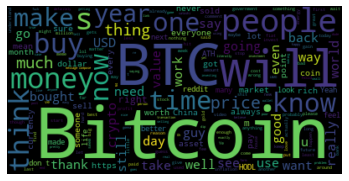

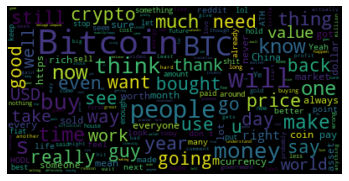

In [17]:
t=""
for s in commentsData['body']:
  t=t+s
# Read the whole text.
text = t

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



# Generic Parser, Plug and Play Code:

In [18]:
class RedditScrapper():
  
  def __init__(self,c_id,c_secret,u_a,usrnm,passwd):
    self.reddit = praw.Reddit(client_id = c_id, 
                         client_secret = c_secret, 
                         user_agent = u_a, 
                         username = usrnm, 
                         password = passwd)
    self.commentColumns=['total_awards_received', 'approved_at_utc', 'author_flair_template_id', 'likes', 
                         'user_reports', 'saved', 'id', 'banned_at_utc', 'mod_reason_title', 'gilded', 'archived', 
                         'no_follow', 'author', 'score', 'author_fullname', 'report_reasons', 'approved_by', 
                         'all_awardings', 'subreddit_id', 'body', 'edited', 'author_flair_css_class', 
                         'is_submitter', 'downs', 'author_flair_richtext', 'subreddit', 
                         'author_flair_text_color', 'score_hidden', 'permalink', 'num_reports', 
                         'locked', 'name', 'created', 'author_flair_text', 'collapsed', 'created_utc', 
                         'subreddit_name_prefixed', 'controversiality']
  
  def getTopPostsForSubReddit(self,subredditName,topK,timeHorizon):
    subbreddit=reddit.subreddit(subredditName)
    topPosts=subbreddit.top(limit=topK,time_filter=timeHorizon)
    totalPosts=0
    totalComments=0
    badData=0
    commentsData=pd.DataFrame(columns=commentColumns)
    for post in topPosts:
      totalPosts=totalPosts+1
      print("POST TITTLE")
      print(post.title)
      post.comments.replace_more(limit=None)
      title=post.title
      for comment in post.comments.list():
        try:
          if(type(comment) == praw.models.reddit.comment.Comment):
              totalComments=totalComments+1
              tempList=[getattr(comment,j.strip()) for j in commentColumns] +[title]
              commentsData=commentsData.append(pd.DataFrame([tempList], columns = commentColumns+ ['Title']))
        except:
          badData=badData+1
          
            
    print("Total Posts parsed", totalPosts)
    print("TotalComments Parse across Posts", totalComments)
    print("BadData etc", badData) 
    return commentsData  

  ## Visualize Word Frequency
  def visualizeWordFreq(self,text):
    import os
    from os import path
    from wordcloud import WordCloud

    # Generate a word cloud image
    wordcloud = WordCloud().generate(text)

    # Display the generated image:
    # the matplotlib way:
    import matplotlib.pyplot as plt
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")

    # lower max_font_size
    wordcloud = WordCloud(max_font_size=40).generate(text)
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
    return;
    # The pil way (if you don't have matplotlib)
    # image = wordcloud.to_image()
    # image.show()
  
  ## Converts dataframe column to full Text
  def convertToFullText(self,df,column):
    t=""
    for s in df[column]:
      t=t+s
    # Read the whole text.
    text = t
    return text;

In [19]:

c_id = "HKkrWHOchy0UIvJKL1jTvQ"               # Personal Use Script (14 char)
c_secret = "hwEgyEAkhQX7ikwFEIQnom15dCGXRQ"           # Secret key (27 char)
u_a = "scraper"               # App name
usrnm = "terrynier"      # Reddit username
passwd = "Reddit.2020!@"     # Reddit login password

scraper=RedditScrapper(c_id,c_secret,u_a,usrnm,passwd)

POST TITTLE
It's called BCH guys!
POST TITTLE
BCH will be the first crypto to face off a Central Bank Digital Currency
POST TITTLE
Prohashing audit finds Graviex improperly crediting deposits; customers advised to withdraw all money immediately
POST TITTLE
We should have more discussion about smartBCH in r/BTC
POST TITTLE
What is less than 0?
POST TITTLE
After using smartBCH, I did 10x times of more transactions than before.
POST TITTLE
Rand Paul: Crypto Could Replace Dollar As World's Reserve Currency...
POST TITTLE
Hello, I received an SLP token on my Bitcoin.com wallet, but I can’t choose to send an SLP token, only BCH, and if I choose it I can’t send to a SLP address, if you know what I can do please reply this message🙏🏻
POST TITTLE
Recipe for Success
POST TITTLE
“I've been politely responding to criticism from Adam Back @notgrubles for weeks. It's time to set the record straight RE Liquid vs. Stacks. Please retweet to help educate people. Tweet thread👇”
Total Posts parsed 10
Total

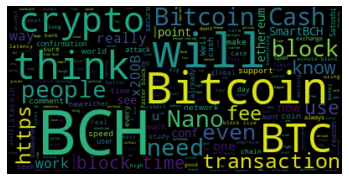

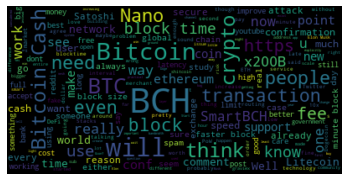

In [20]:
data=scraper.getTopPostsForSubReddit('BTC',10,'day')
text=scraper.convertToFullText(data,'body')
scraper.visualizeWordFreq(text)


In [31]:
!pip install nltk

In [44]:
text

'Also, TetherI notice that he has finally laid aside his security blanket.Truth: Bitcoin cash is the real bitcoin.Been one of those days for me. Not a terrible quote.But the main thing matter is what is the truth and what to destroy.I strongly believed the scaling debate ended up being a poison pill to make BTC a financial instrument which is friendly to banking system (Store of value that is sold as instruments by institutions) instead of a p2p digital money which can be utilized by a quickly digitized society (Cryptocurrency with potential for a circle economy which takes power away from institutions) \n\nThere is vitriol coming from a lot of btc maximalists who feel as if bch was an attack on bitcoin. Bank funding developers was an attack on bitcoin. Censorship of reddit and bitcoin talk was an attack on bitcoin. Using politics of round-tables vs miner voting by hashrate was an attack on bitcoin. \n\nSeeing mainstream acceptance of bitcoin is a bittersweet moment. It is nice seeing 

In [60]:
!pip install stopwords

In [23]:
from nltk.corpus import reuters, stopwords
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
import pandas as pd
from collections import Counter
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tareqnieroukh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
lemmatizer = WordNetLemmatizer()

In [25]:
def process_text(text):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return output

In [26]:
def word_counter(text): 
    # Combine all articles in corpus into one large string
    big_string = ''.join(text)
    processed = process_text(big_string)
    top_10 = dict(Counter(processed).most_common(30))
    return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [27]:
word_counter(text)

,word,count
0,bch,58
1,block,53
2,bitcoin,44
3,like,29
4,cash,28
5,dont,26
6,ha,26
7,think,22
8,time,22
9,wa,20


In [28]:
def bigram_counter(text): 
    # Combine all articles in corpus into one large string
    big_string = ''.join(text)
    processed = process_text(big_string)
    bigrams = ngrams(processed, n=2)
    top_10 = dict(Counter(bigrams).most_common(30))
    return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

In [29]:
bigram_counter(text)

,bigram,count
0,"(bitcoin, cash)",19
1,"(block, time)",13
2,"(minute, block)",8
3,"(block, size)",7
4,"(faster, block)",6
5,"(dont, know)",5
6,"(get, working)",4
7,"(significant, study)",4
8,"(created, bitcoin)",4
9,"(block, interval)",4
